## Set Up

I imported all the libraries that I would need to complete this assignment. I then proceeded to load in the data into a pandas dataframe using the url for the dataset.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [33]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

## Exploring Data

To get a better sence of the data and what I am working with I printed out the information using the following: shape, info, columns, columns.size, index, and checking for null/na values. In the dataset there are no null or NA values. 

In [43]:
print(df.shape)
print(df.info())
print(df.columns)
print(df.columns.size)
print(df.index)
print(df.isnull().sum())
print(df.isna().sum())

(1372, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtsies  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   classes   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
Index(['variance', 'skew', 'curtsies', 'entropy', 'classes'], dtype='object')
5
RangeIndex(start=0, stop=1372, step=1)
variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64
variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64


In [35]:
df.head()

,variance,skew,curtsies,entropy,classes
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [36]:
df.tail()

,variance,skew,curtsies,entropy,classes
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


## Visualizing The Data

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skew'}>],
       [<AxesSubplot:title={'center':'curtsies'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'classes'}>, <AxesSubplot:>]],
      dtype=object)

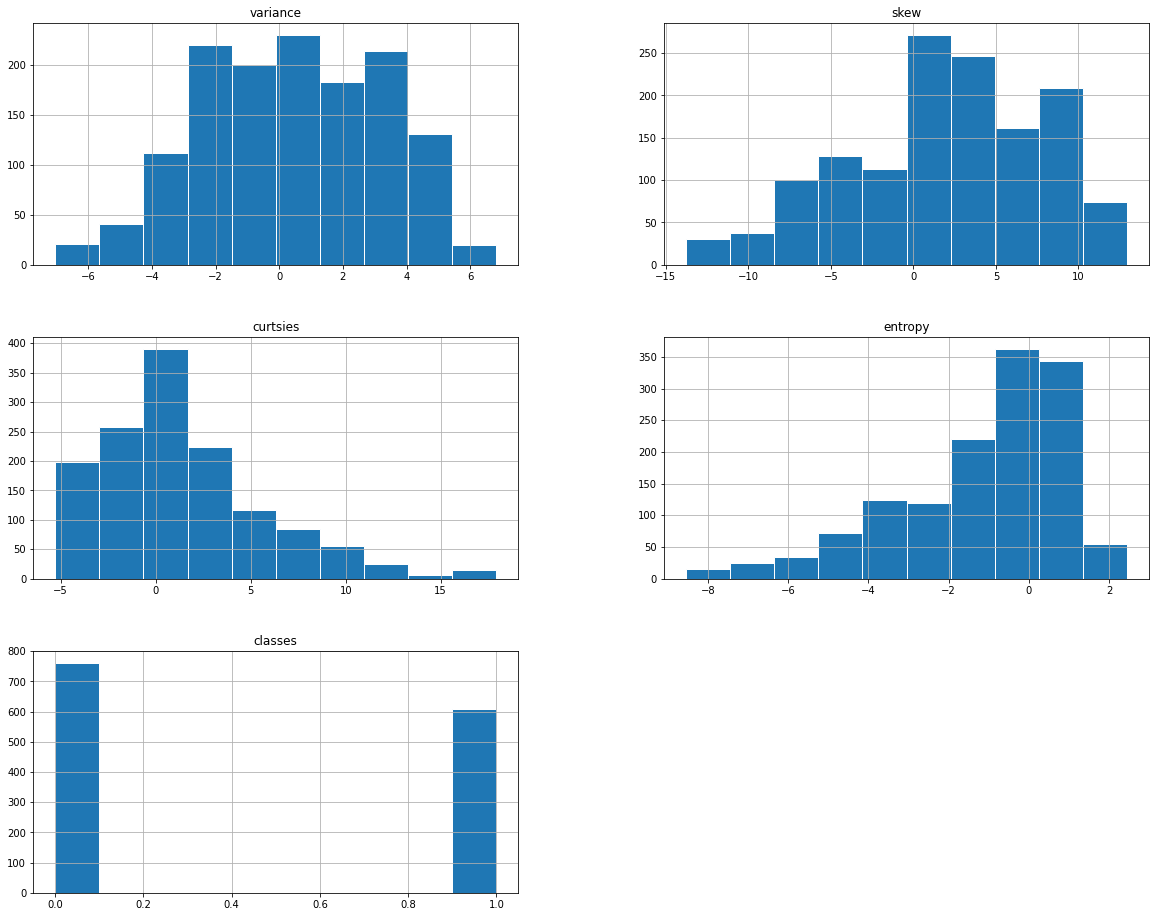

In [37]:
df.hist(edgecolor = 'white', figsize = (20,16))

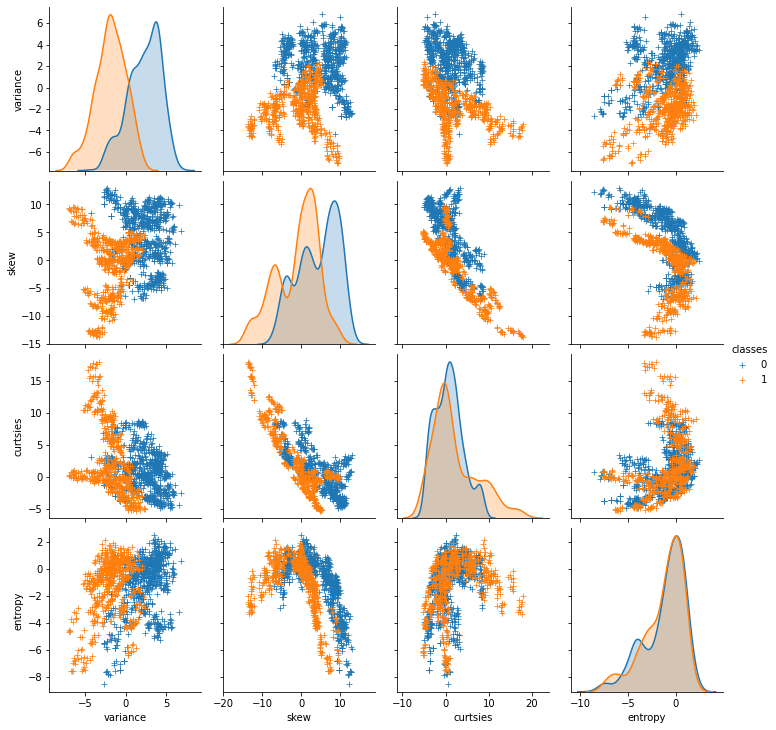

In [38]:
g = sns.pairplot(df, hue='classes', markers='+')
plt.show()

## Prepare Data

In [39]:
x = df.drop(['classes'], axis=1)
y = df['classes']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1, stratify=y)

## Model Training

In [41]:
#Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred) * 100)

98.1785063752277
